In [9]:
# import statements
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
import time

In [10]:
df_train=pd.read_csv('partCleaned.csv')
# df_train.head

In [11]:
df_tr=df_train

In [12]:
clmns = ['Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']
tr_clmns=['Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']#,'Soil']

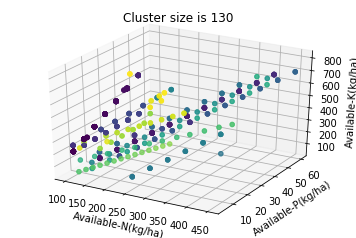

In [13]:
# for i in range(2,700,20):
i=600
# kmeans = KMeans(n_clusters=i, random_state=0).fit(df_tr[tr_clmns])
# labels = kmeans.labels_
meanShift=MeanShift(bandwidth=2).fit(df_tr[tr_clmns])
labels = meanShift.labels_
df_tr['clusters'] = labels
clmns.extend(['clusters'])
df_clust=df_tr[clmns]
df_test=df_tr[tr_clmns]
clusterCenters=meanShift.cluster_centers_
n_cluster=len(np.unique(labels))
#listOutput.append(kmeans.score(df_test.values))
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_tr[tr_clmns[0]],df_tr[tr_clmns[1]],df_tr[tr_clmns[2]],c=labels,marker='o');
ax.set_title("Cluster size is "+str(n_cluster))
ax.set_xlabel('Available-N(kg/ha)')
ax.set_ylabel('Available-P(kg/ha)')
ax.set_zlabel('Available-K(kg/ha)')
plt.show()
# values=np.array([['122','6.048','348']])#,['0.4','0.5','0.6','0.6']])
# #     print(values)
# prediction=kmeans.predict(values)
# #     print(prediction)
# out=df_tr[['Crop','Variety']].loc[df_tr['clusters'] ==  prediction[0]]
# print(out)

In [14]:
 values=np.array([['210','10','60']])#,['0.4','0.5','0.6','0.6']])
#  print(values)
 #m[inds,np.arange(mshape[1])]=values
prediction=meanShift.predict(values)
print("Predicted Cluster "+str(prediction))

Predicted Cluster [51]


In [15]:
output=df_tr[['Crop','Variety','Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)','Required-N(kg/ha)','Required-P(kg/ha)','Required-K(kg/ha)','Yeild(q/ha)']].loc[df_tr['clusters'] ==  prediction[0]]
# print(output)
df_test=df_tr[tr_clmns]
output

,Crop,Variety,Soil,Available-N(kg/ha),Available-P(kg/ha),Available-K(kg/ha),Required-N(kg/ha),Required-P(kg/ha),Required-K(kg/ha),Yeild(q/ha)
328,Rice,IET-4094,1,250,5,100,111.0,84.0,87.0,3.5
329,Rice,IET-4094,1,250,5,100,129.0,98.0,90.0,4.0
340,Borp Rice,IET-4789,1,250,5,100,117.0,90.0,71.0,55.0
341,Borp Rice,IET-4789,1,250,5,100,139.0,99.0,80.0,60.0
